# Proyecto 2-Parte I (Core)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils


In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Verificamos si existen duplicados

In [7]:
# Identificar duplicados
duplicados = data.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados antes de eliminarlos: {num_duplicados}")

# Eliminar duplicados y actualizar el DataFrame
data = data.drop_duplicates()

# Identificar duplicados nuevamente
duplicados = data.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados después de eliminarlos: {num_duplicados}")

Número de registros duplicados antes de eliminarlos: 1
Número de registros duplicados después de eliminarlos: 0


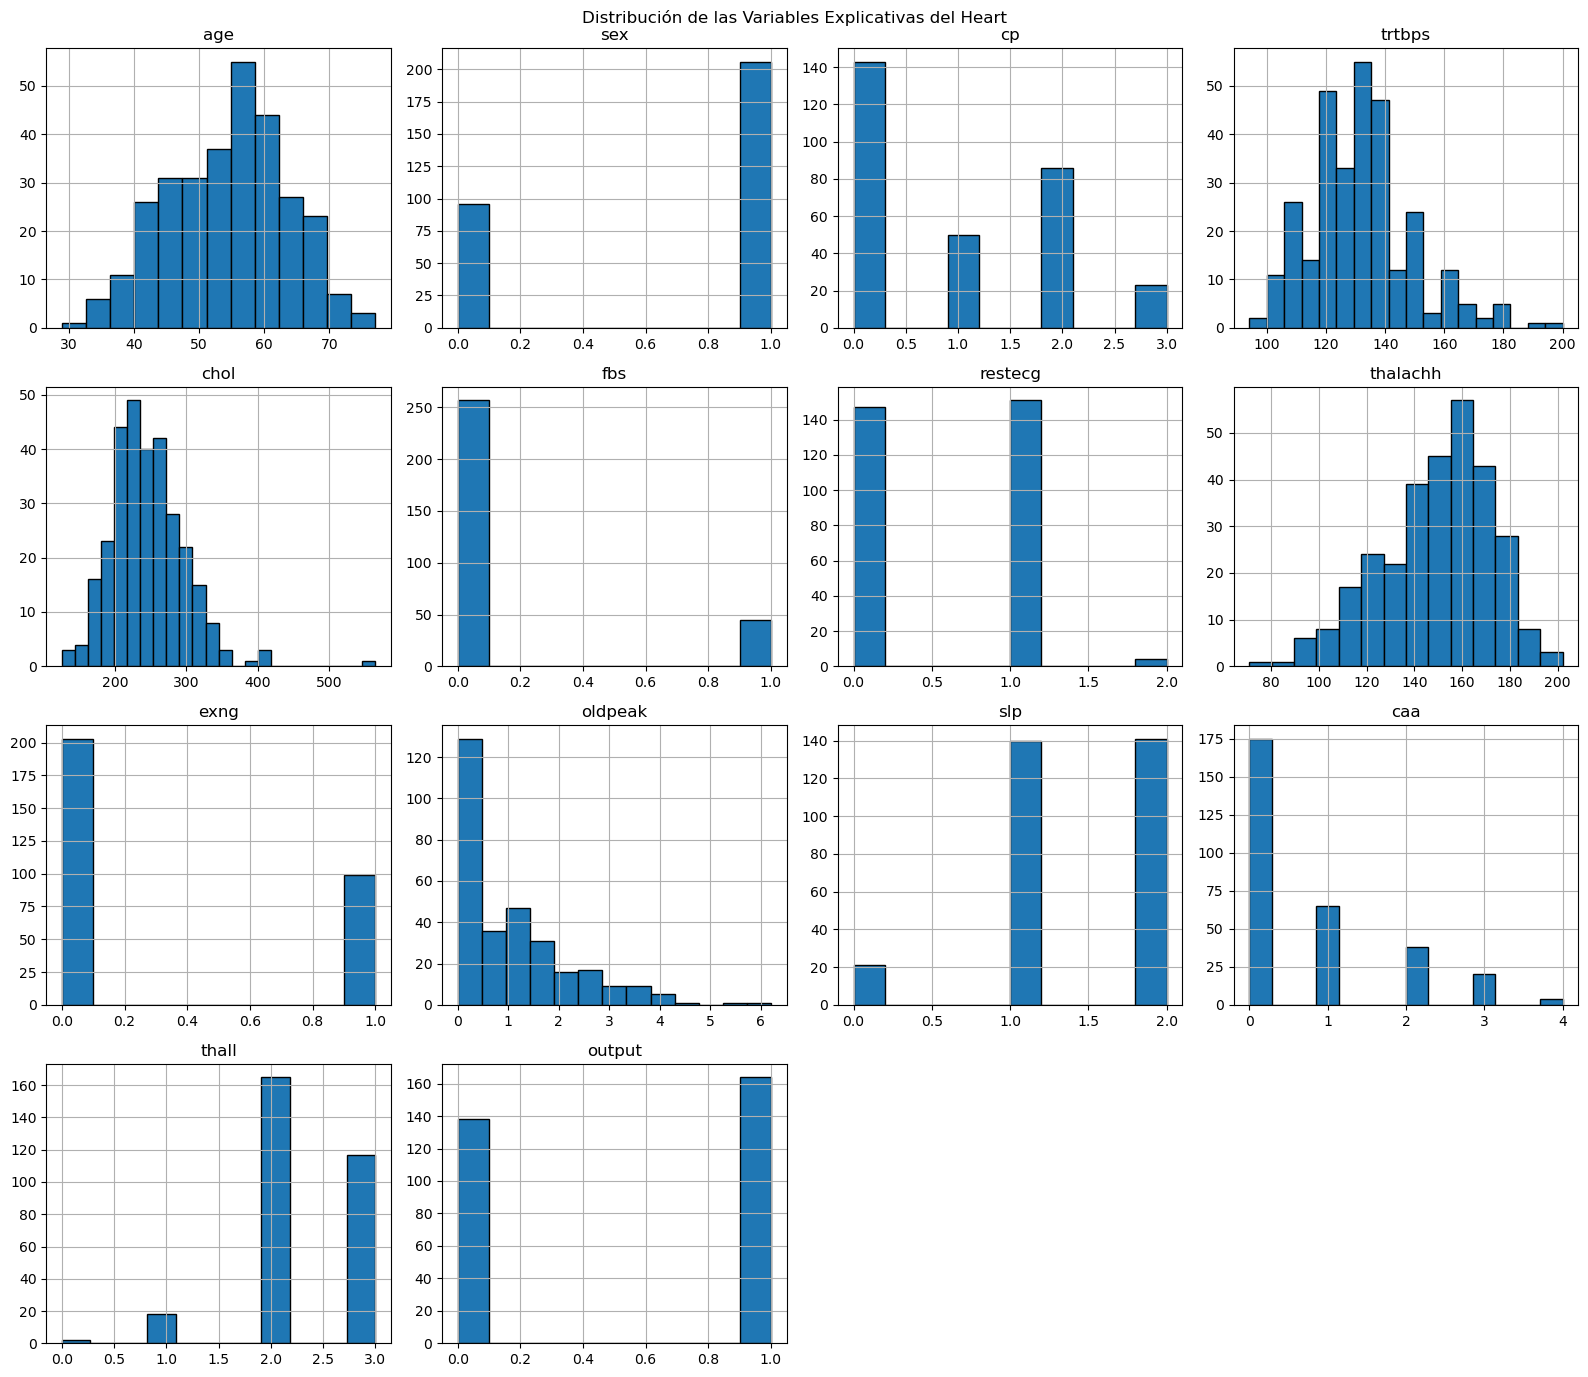

In [8]:
# Crear histogramas para cada característica
data.hist(bins='auto', figsize=(16, 14), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Heart')
plt.tight_layout()
plt.show()

Separamos las variables categoricas y numericas para mejor control

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
# Seleccionar las columnas categoricas
categorical_columns = data[['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'output']].copy()
# Seleccionar las columnas numéricas
numerical_columns = data[["age","trtbps","chol","thalachh","oldpeak"]].copy()

Consistencia en valores categoricos

In [11]:
categorical_columns.head()

,sex,exng,caa,cp,fbs,restecg,slp,thall,output
0,1,0,0,3,1,0,0,1,1
1,1,0,0,2,0,1,0,2,1
2,0,0,0,1,0,0,2,2,1
3,1,0,0,1,0,1,2,2,1
4,0,1,0,0,0,1,2,2,1


In [12]:
data_dict_category = {
    'sex': 'bool',
    'exng': 'bool',
    'caa': 'category',
    'cp': 'category',
    'fbs': 'bool',
    'restecg': 'category',
    'slp': 'category',
    'thall': 'category',
    'output': 'bool'
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_category.items():
    categorical_columns[column] = categorical_columns[column].astype(dtype, errors='ignore')
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   sex      302 non-null    bool    
 1   exng     302 non-null    bool    
 2   caa      302 non-null    category
 3   cp       302 non-null    category
 4   fbs      302 non-null    bool    
 5   restecg  302 non-null    category
 6   slp      302 non-null    category
 7   thall    302 non-null    category
 8   output   302 non-null    bool    
dtypes: bool(4), category(5)
memory usage: 5.9 KB


Limpiamos las columnas categoricas, nos aseguramos de quitar mayusculas y cualquier caracter invalido

In [13]:
# Aplicar la limpieza a las columnas categóricas
for col in categorical_columns:
    categorical_columns[col] = categorical_columns[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in categorical_columns:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(categorical_columns[col].unique())


Valores únicos después de limpieza en 'sex':
[ True False]

Valores únicos después de limpieza en 'exng':
[False  True]

Valores únicos después de limpieza en 'caa':
[0, 2, 1, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]

Valores únicos después de limpieza en 'cp':
[3, 2, 1, 0]
Categories (4, int64): [0, 1, 2, 3]

Valores únicos después de limpieza en 'fbs':
[ True False]

Valores únicos después de limpieza en 'restecg':
[0, 1, 2]
Categories (3, int64): [0, 1, 2]

Valores únicos después de limpieza en 'slp':
[0, 2, 1]
Categories (3, int64): [0, 1, 2]

Valores únicos después de limpieza en 'thall':
[1, 2, 3, 0]
Categories (4, int64): [0, 1, 2, 3]

Valores únicos después de limpieza en 'output':
[ True False]


Verificamos que esten todos correctos

In [14]:
# Ejecutar la validación
mismatches = utils.validar_tipos(categorical_columns, data_dict_category)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos son correctos.


Vemos si existen NaN en las columnas categoricas

In [15]:
utils.calculate_na_statistics(categorical_columns)

,datos sin NAs en q,Na en q,Na en %
sex,302,0,0.0
exng,302,0,0.0
caa,302,0,0.0
cp,302,0,0.0
fbs,302,0,0.0
restecg,302,0,0.0
slp,302,0,0.0
thall,302,0,0.0
output,302,0,0.0


Consistencia en valores numericos

In [16]:
numerical_columns

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [17]:
# Crear el diccionario con los tipos de datos
data_dict_numeric = {
    'age': 'int',
    'trtbps': 'int',
    'chol': 'int',
    'thalachh': 'int',
    'oldpeak': 'float'
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_numeric.items():
    numerical_columns[column] = numerical_columns[column].astype(dtype, errors='ignore')

# Inspeccionar la información
numerical_columns.info()


<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int32  
 1   trtbps    302 non-null    int32  
 2   chol      302 non-null    int32  
 3   thalachh  302 non-null    int32  
 4   oldpeak   302 non-null    float64
dtypes: float64(1), int32(4)
memory usage: 9.4 KB


Limpiamos las columnas numericas

In [18]:
for col in numerical_columns:
    numerical_columns[col] = numerical_columns[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in numerical_columns:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(numerical_columns[col].unique())


Valores únicos después de limpieza en 'age':
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Valores únicos después de limpieza en 'trtbps':
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Valores únicos después de limpieza en 'chol':
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 

Verificamos si existen NaN en las columnas numericas

In [19]:
utils.calculate_na_statistics(numerical_columns)

,datos sin NAs en q,Na en q,Na en %
age,302,0,0.0
trtbps,302,0,0.0
chol,302,0,0.0
thalachh,302,0,0.0
oldpeak,302,0,0.0


Graficamos boxplots para identificar los posibles Outliers

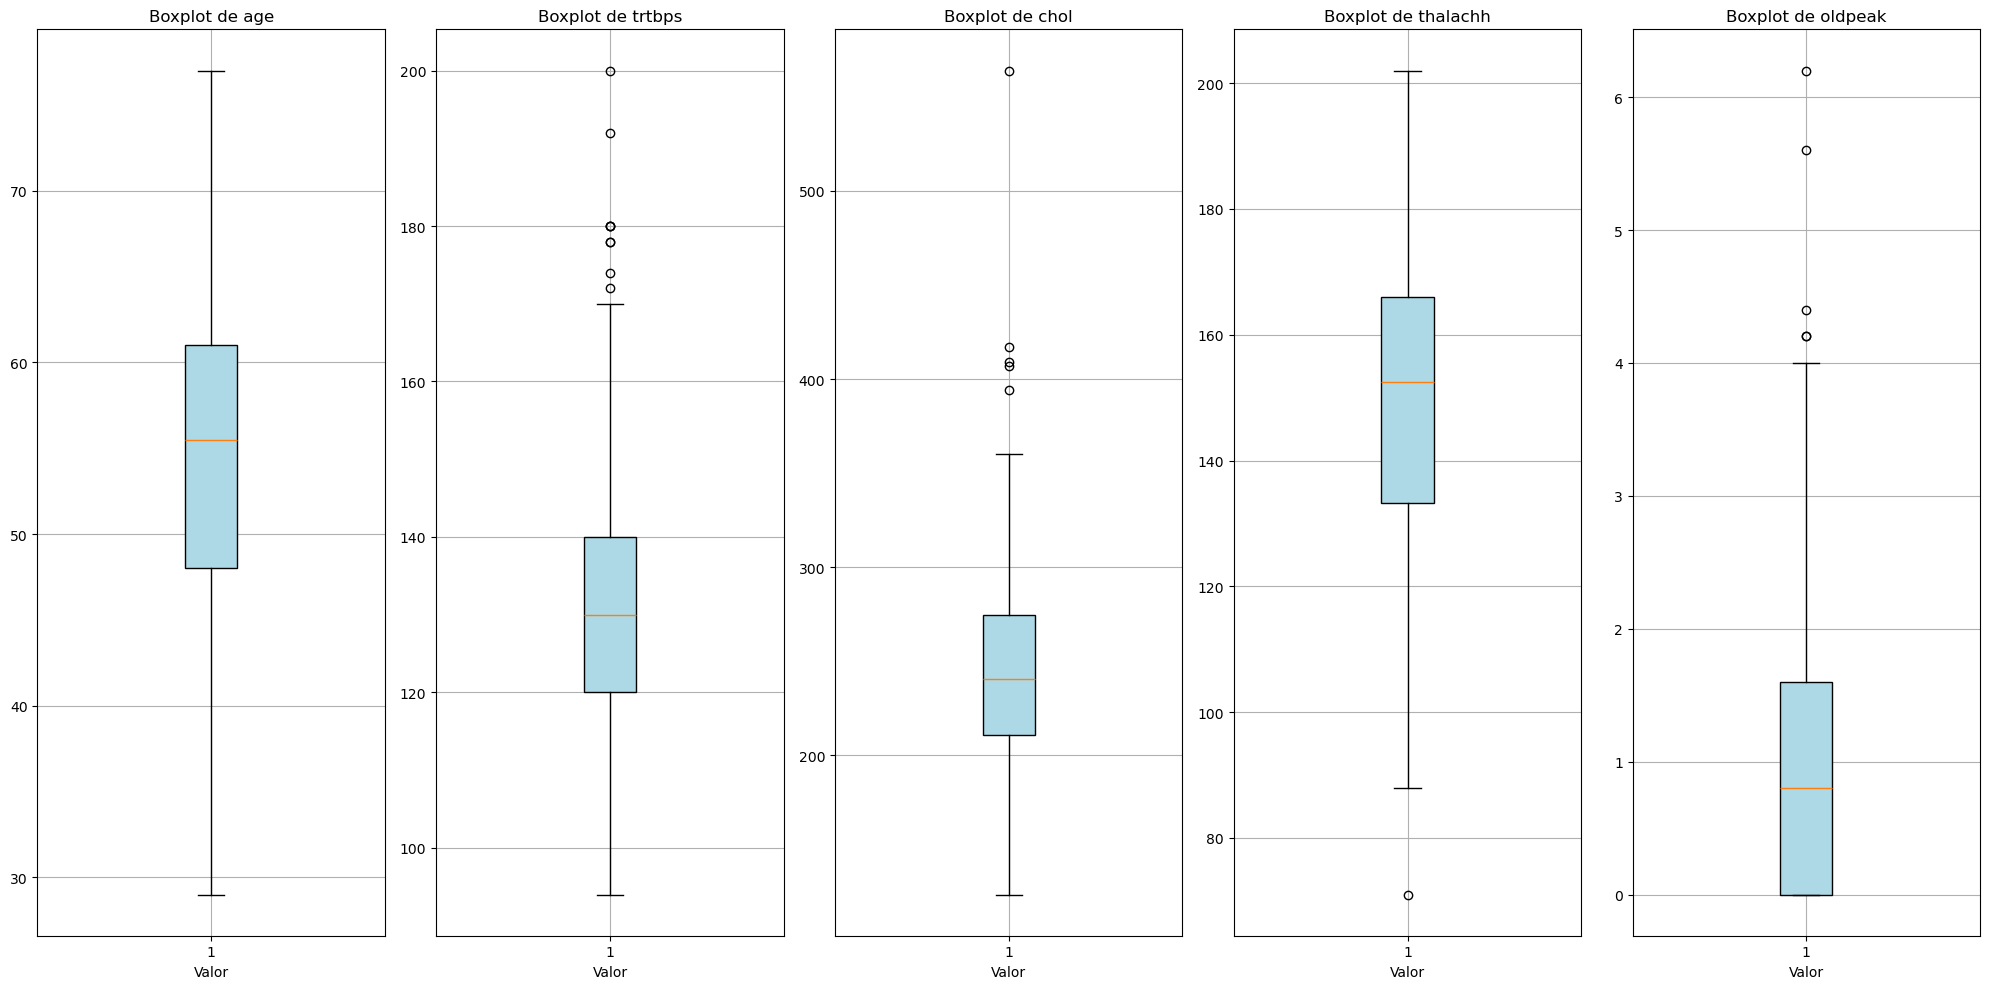

In [20]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(numerical_columns.columns):
    axes[i].boxplot(numerical_columns[col], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}'),
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Calculamos los porcentajes de Outliers

In [21]:
# Identify numerical columns
numerical_columns 
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
age,0.0,0.000000,29.0,77.0
trtbps,9.0,2.980132,94.0,170.0
chol,5.0,1.655629,126.0,360.0
thalachh,1.0,0.331126,88.0,202.0
oldpeak,5.0,1.655629,0.0,4.0


Analizamos las columnas con outliers


📊 Análisis de Distribución para trtbps
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 131.6026
- Mediana: 130.0000
- Desv_est: 17.5634
- Asimetria: 0.7165
- Kurtosis: 0.9230
- Min: 94.0000
- Max: 200.0000

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.0830
- Weibull: p-valor = 0.0362

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución leptocúrtica (más puntiaguda)

🏆 Mejor distribución: Gamma


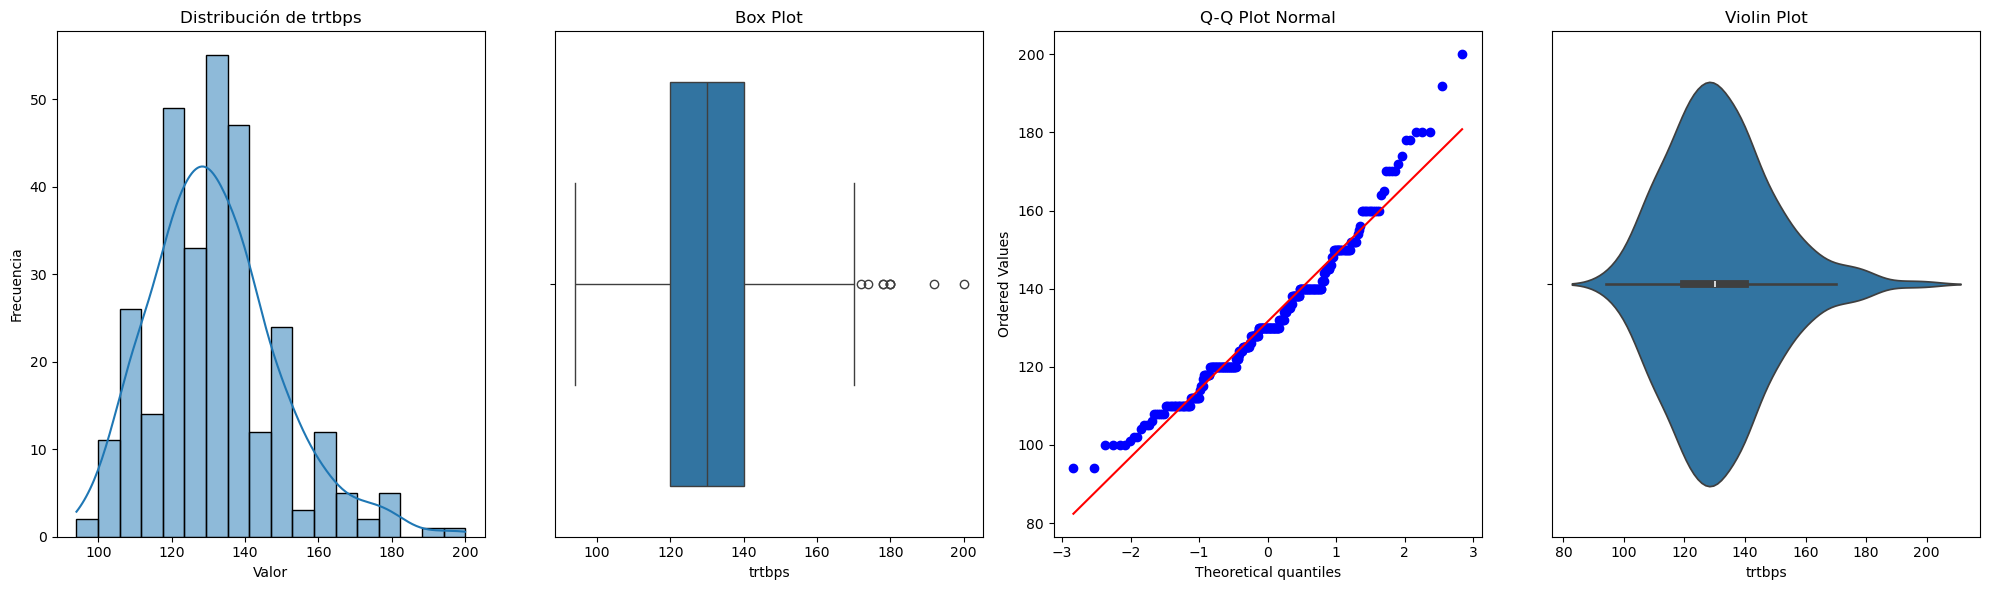

In [22]:
resultados = utils.analizar_distribucion_avanzada(data['trtbps'], 'trtbps')


📊 Análisis de Distribución para chol
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 246.5000
- Mediana: 240.5000
- Desv_est: 51.7535
- Asimetria: 1.1473
- Kurtosis: 4.5426
- Min: 126.0000
- Max: 564.0000

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.8223
- Weibull: p-valor = 0.1245

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución leptocúrtica (más puntiaguda)

🏆 Mejor distribución: Gamma


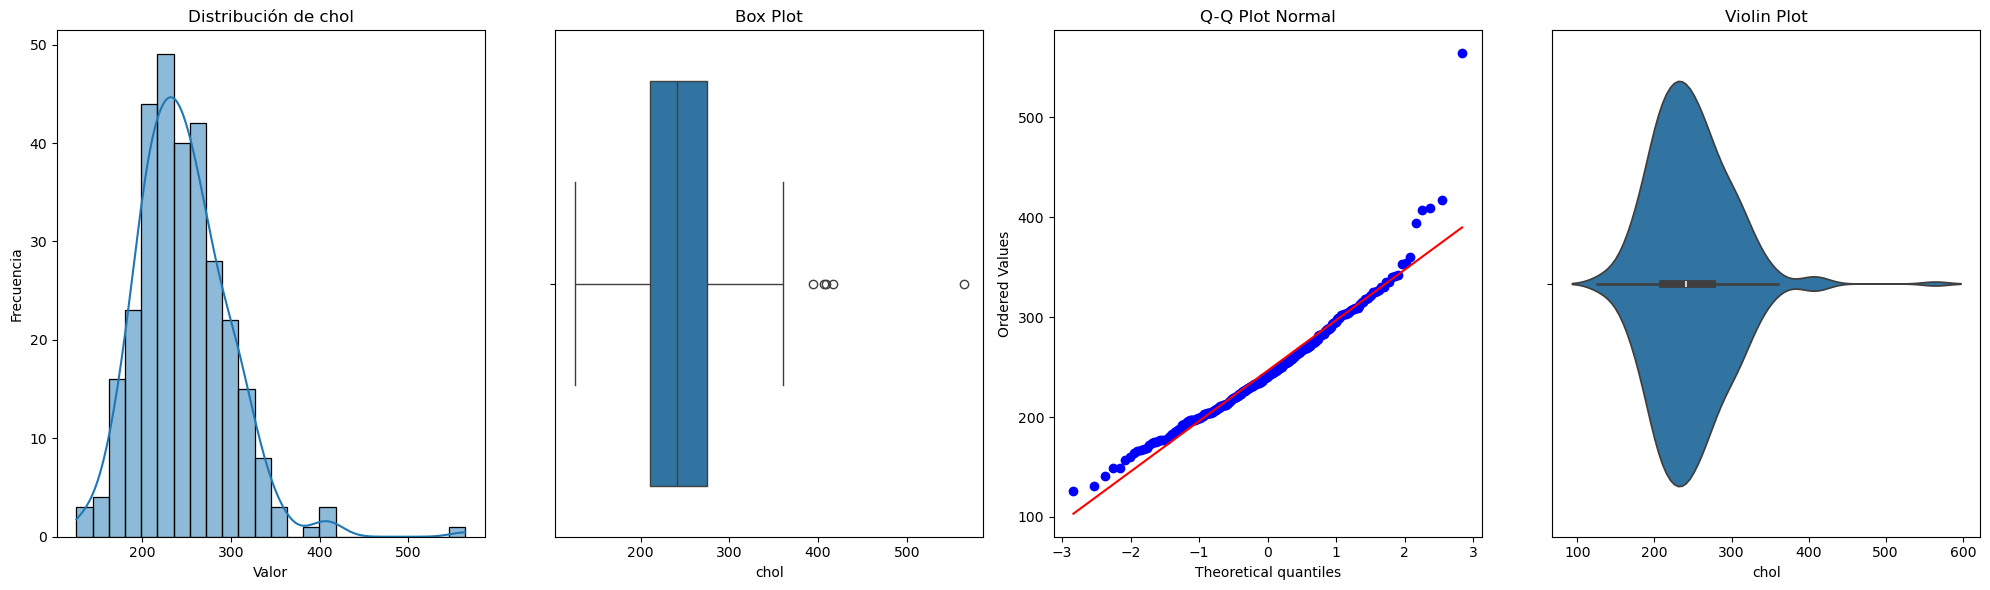

In [23]:
resultados = utils.analizar_distribucion_avanzada(data['chol'], 'chol')


📊 Análisis de Distribución para oldpeak
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 1.0430
- Mediana: 0.8000
- Desv_est: 1.1615
- Asimetria: 1.2662
- Kurtosis: 1.5679
- Min: 0.0000
- Max: 6.2000

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.1206
- Weibull: p-valor = 0.2538

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución leptocúrtica (más puntiaguda)

🏆 Mejor distribución: Weibull


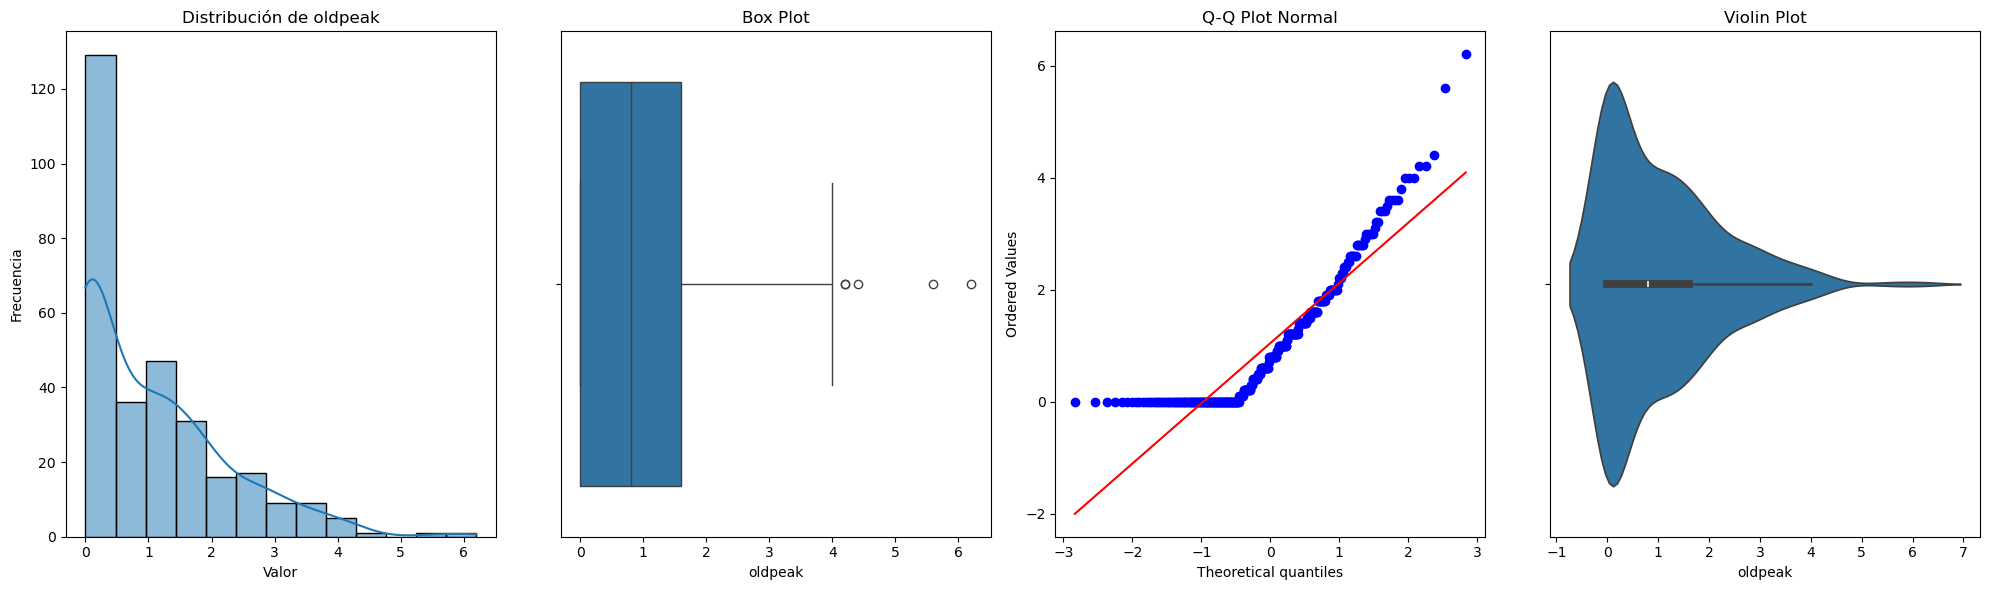

In [24]:
resultados = utils.analizar_distribucion_avanzada(data['oldpeak'], 'oldpeak')

Despues de analizar los outliers decido no imputar

Estadisticas Descriptivas de las Columnas Numericas

In [25]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numerical_columns:
    datos_columna = data[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
age,302.0,54.42,55.5,9.05,29.0,77.0,48.00,61.00
trtbps,302.0,131.60,130.0,17.56,94.0,200.0,120.00,140.00
chol,302.0,246.50,240.5,51.75,126.0,564.0,211.00,274.75
thalachh,302.0,149.57,152.5,22.90,71.0,202.0,133.25,166.00
oldpeak,302.0,1.04,0.8,1.16,0.0,6.2,0.00,1.60


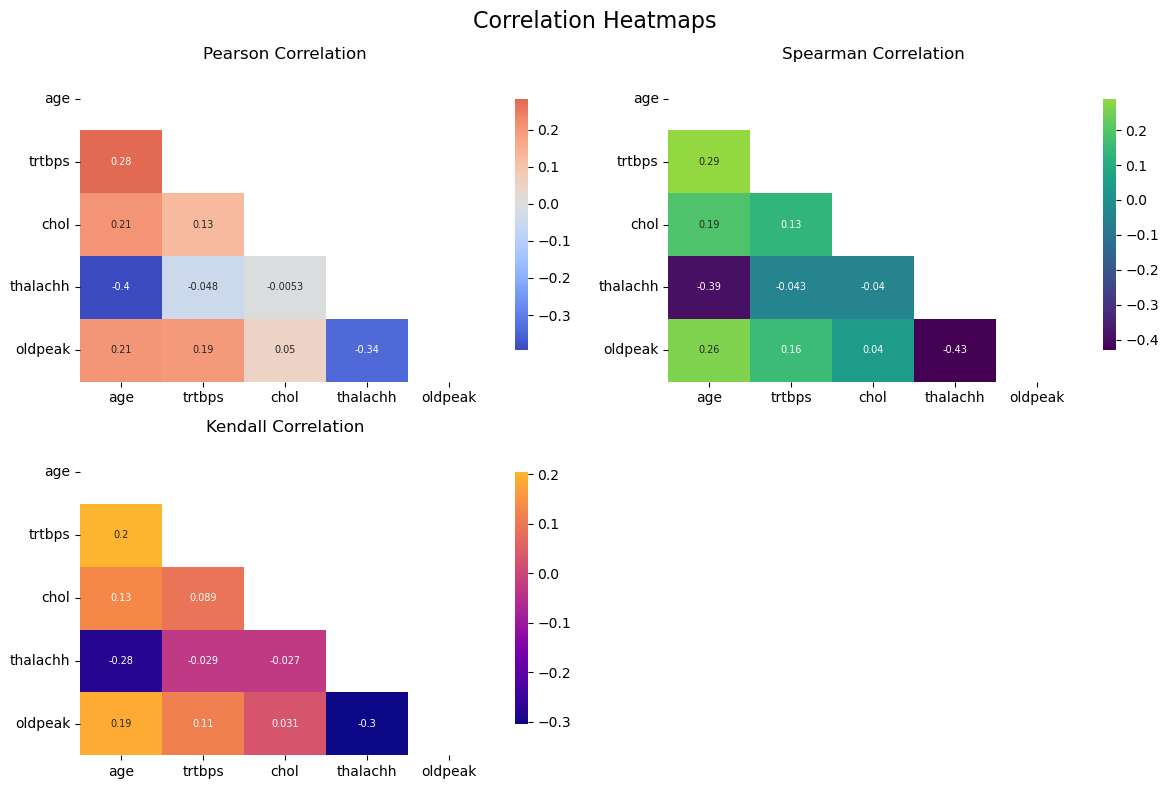

In [26]:
pearson_corr = numerical_columns.corr(method='pearson')
spearman_corr = numerical_columns.corr(method='spearman')
kendall_corr = numerical_columns.corr(method='kendall')

utils.graph_correlations(
    pearson_corr, 
    spearman_corr, 
    kendall_corr, 
    title="Correlation Heatmaps", 
    figsize=(12, 8),
    annot_size=7
)

In [27]:
data_clean = pd.concat([numerical_columns, categorical_columns], axis=1)
data_clean.head()



,age,trtbps,chol,thalachh,oldpeak,sex,exng,caa,cp,fbs,restecg,slp,thall,output
0,63,145,233,150,2.3,True,False,0,3,True,0,0,1,True
1,37,130,250,187,3.5,True,False,0,2,False,1,0,2,True
2,41,130,204,172,1.4,False,False,0,1,False,0,2,2,True
3,56,120,236,178,0.8,True,False,0,1,False,1,2,2,True
4,57,120,354,163,0.6,False,True,0,0,False,1,2,2,True
